In [151]:
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge,RidgeClassifier
from sklearn.ensemble import RandomForestClassifier ,AdaBoostClassifier
from xgboost import XGBClassifier

from sklearn.tree import  DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,precision_score,f1_score,recall_score,confusion_matrix
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier

In [152]:
data=pd.read_csv(r"C:\Users\Acer\Downloads\accident.csv")
data.head()

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,Female,27,No,No,1
1,69,Female,46,No,Yes,1
2,46,Male,46,Yes,Yes,0
3,32,Male,117,No,Yes,0
4,60,Female,40,Yes,Yes,0


In [153]:
data.isnull().sum()

Age                0
Gender             0
Speed_of_Impact    0
Helmet_Used        0
Seatbelt_Used      0
Survived           0
dtype: int64

In [154]:
data.describe()

,Age,Speed_of_Impact,Survived
count,200.00000,200.000000,200.00000
mean,43.42500,70.345000,0.50500
std,14.94191,29.936549,0.50123
min,18.00000,20.000000,0.00000
25%,31.00000,43.000000,0.00000
50%,43.50000,71.000000,1.00000
75%,56.00000,95.000000,1.00000
max,69.00000,119.000000,1.00000


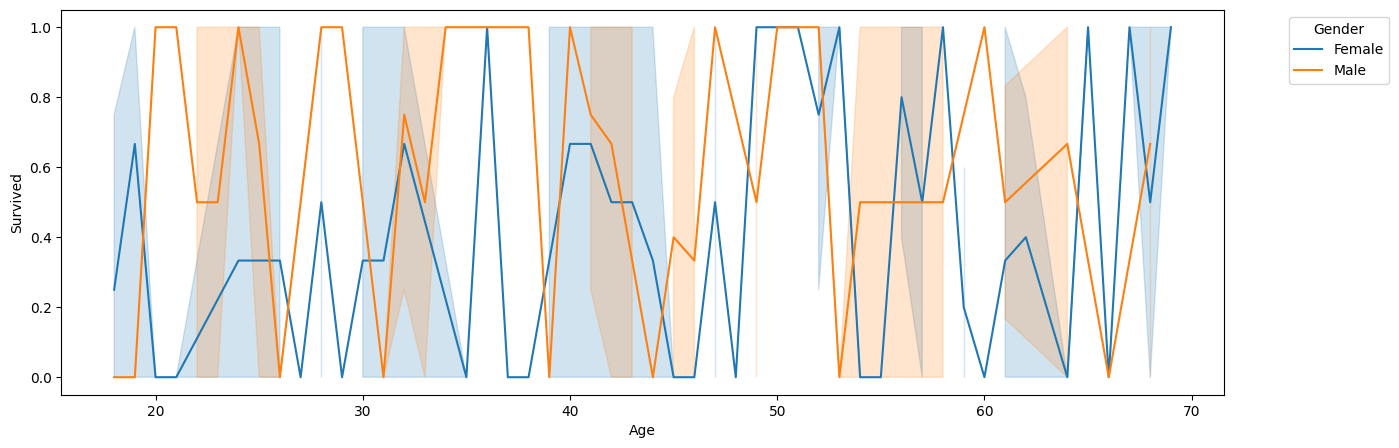

In [155]:
plt.figure(figsize=(15,5))
sns.lineplot(x="Age",y="Survived",hue="Gender",data=data)
plt.xlabel("Age")
plt.ylabel("Survived")
plt.legend(title="Gender", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

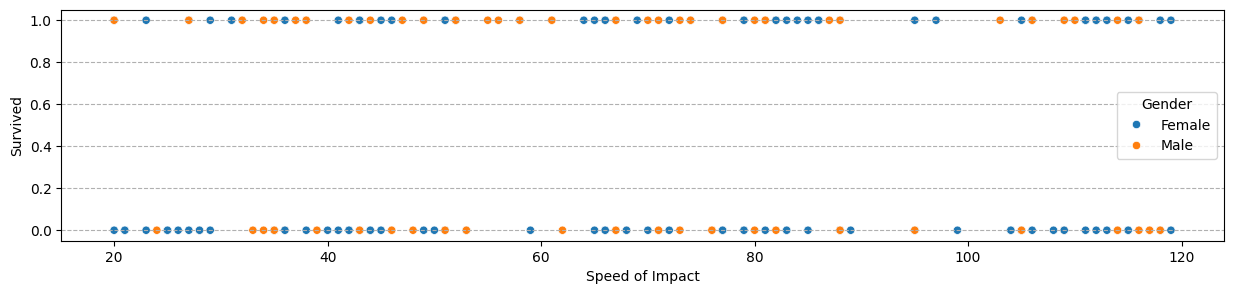

In [156]:
plt.figure(figsize=(15,3))
sns.scatterplot(x="Speed_of_Impact",y="Survived",hue="Gender",data=data)
plt.grid(linestyle='--', axis='y')
plt.xlabel("Speed of Impact")
plt.ylabel("Survived")
plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_23248\1055959912.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['Gender'], data=data, palette='BrBG')


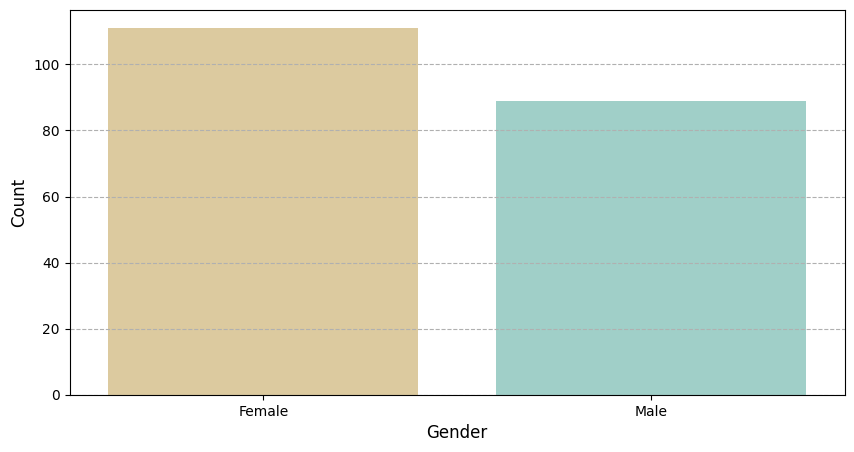

In [157]:
plt.figure(figsize=(10,5))
sns.countplot(x=data['Gender'], data=data, palette='BrBG')
plt.grid(linestyle='--', axis='y')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

In [158]:
cat_col=["Seatbelt_Used","Speed_of_impact","gender"]
for col in data:
    le=LabelEncoder()
    data[col]=le.fit_transform(data[col])

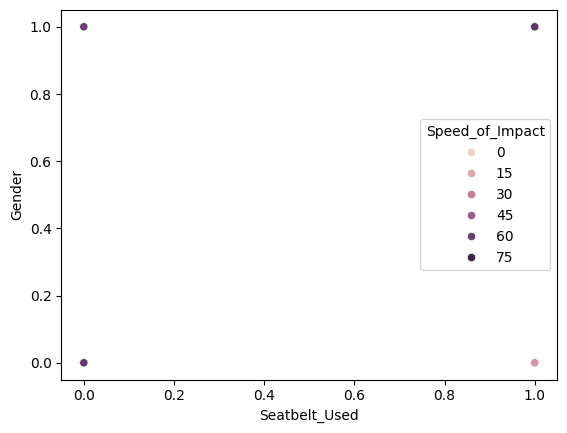

In [159]:
sns.scatterplot(x="Seatbelt_Used",y="Gender",hue="Speed_of_Impact",data=data)
plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_23248\4218747440.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['Gender'], data=data, palette='BrBG')


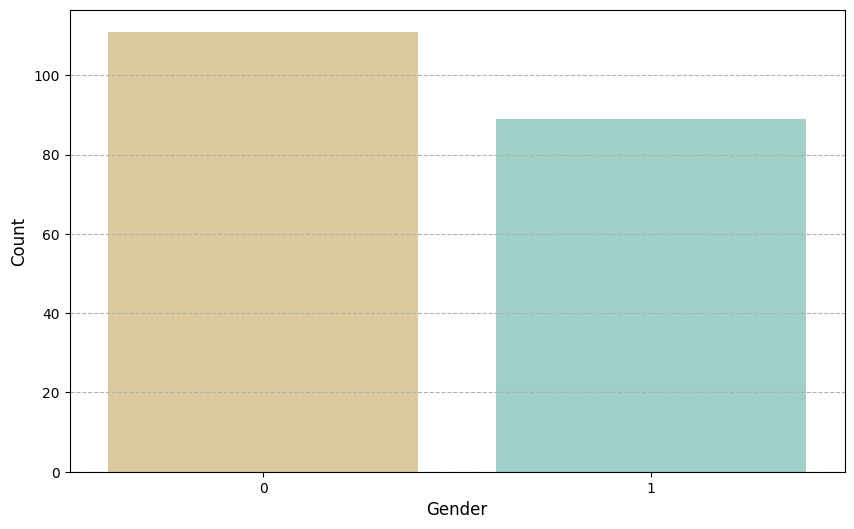

In [160]:
plt.figure(figsize=(10,6))
sns.countplot(x=data['Gender'], data=data, palette='BrBG')
plt.grid(linestyle='--', axis='y')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

In [161]:
x=data.drop(columns=["Survived"])
y=data["Survived"]

In [162]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [163]:
# sc=StandardScaler()
# x_train=sc.fit_transform(x_train)
# x_test=sc.fit_transform(x_test)

In [164]:
models = {
    "RidgeClassifier": RidgeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "LGBMClassifier": LGBMClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(),
    
}


In [165]:
def evaluate(true,prediction):
    recall_scr=recall_score(true,prediction)
    prcsn_scr=precision_score(true,prediction)
    f1_scr=f1_score(true,prediction)
    return recall_scr,prcsn_scr, f1_scr

In [166]:
model_list=[]
f1_list=[]
for model_name,model in models.items():
    model.fit(x_train,y_train)
    train_pred=model.predict(x_train)
    test_pred=model.predict(x_test)

    train_recall,train_prcsn,train_f1=evaluate(y_train,train_pred)
    test_recall,test_prcsn,test_f1=evaluate(y_test,test_pred)

    print(model_name)
    model_list.append(model_name)
    print(f"Training F1 score {train_f1}")
    print(f"Training Recall {train_recall}")
    print(f"Training Precision {train_prcsn}")

    print(f"Testing F1 score {test_f1}")
    print(f"Testing Recall {test_recall}")
    print(f"Testing Precision {test_prcsn}")
    f1_list.append(train_f1)

    print("--"*30)
    print("\n")

RidgeClassifier
Training F1 score 0.5882352941176471
Training Recall 0.6024096385542169
Training Precision 0.5747126436781609
Testing F1 score 0.45161290322580644
Testing Recall 0.3888888888888889
Testing Precision 0.5384615384615384
------------------------------------------------------------


RandomForestClassifier
Training F1 score 1.0
Training Recall 1.0
Training Precision 1.0
Testing F1 score 0.5555555555555556
Testing Recall 0.5555555555555556
Testing Precision 0.5555555555555556
------------------------------------------------------------


DecisionTreeClassifier
Training F1 score 1.0
Training Recall 1.0
Training Precision 1.0
Testing F1 score 0.5
Testing Recall 0.5555555555555556
Testing Precision 0.45454545454545453
------------------------------------------------------------


KNeighborsClassifier
Training F1 score 0.7
Training Recall 0.7590361445783133
Training Precision 0.6494845360824743
Testing F1 score 0.5128205128205128
Testing Recall 0.5555555555555556
Testing Precisi

In [167]:
pd.DataFrame(list(zip(model_list,f1_list)),columns=["Model Name","F1 Scores"]).sort_values(by=["F1 Scores"], ascending=False)

,Model Name,F1 Scores
1,RandomForestClassifier,1.000000
2,DecisionTreeClassifier,1.000000
4,LGBMClassifier,0.809524
3,KNeighborsClassifier,0.700000
5,AdaBoostClassifier,0.618182
0,RidgeClassifier,0.588235


In [171]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_test,y_test)

0.5

In [173]:
y_pred=dt.predict(x_test)

<Axes: >

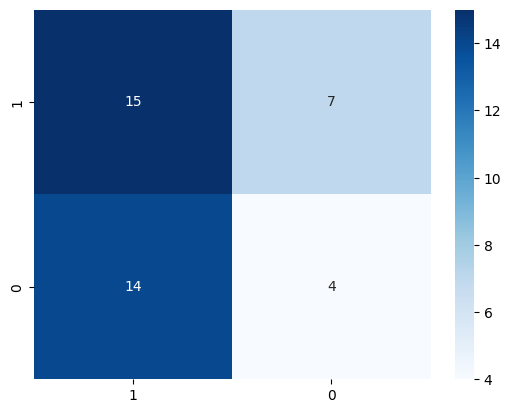

In [176]:
y_pred=model.predict(x_test)
cm=confusion_matrix(y_test,y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["1","0"], yticklabels=["1","0"])

C:\Users\Acer\AppData\Local\Temp\ipykernel_23248\2815614496.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importances",y="Features",data=feat_df,  palette='viridis')


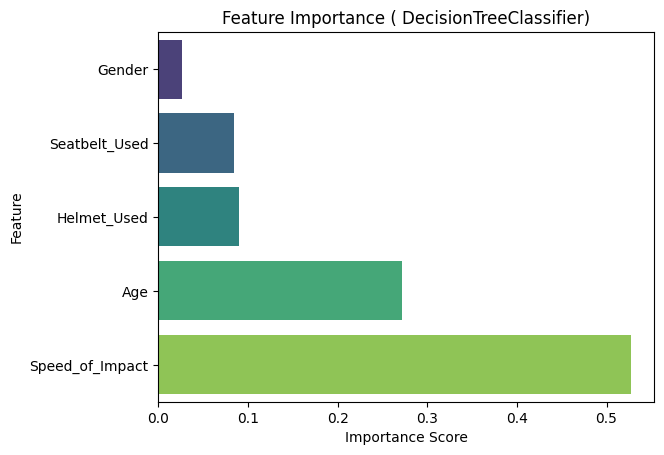

In [177]:
Importances=dt.feature_importances_
feature=x.columns

feat_df=pd.DataFrame({"Features":feature,"Importances":Importances}).sort_values(by="Importances")

sns.barplot(x="Importances",y="Features",data=feat_df,  palette='viridis')
plt.title("Feature Importance ( DecisionTreeClassifier)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()